### Traffic Analysis 
## by: Ayan Shah

First import the traffic data from all the neighborhoods in Pittsburgh

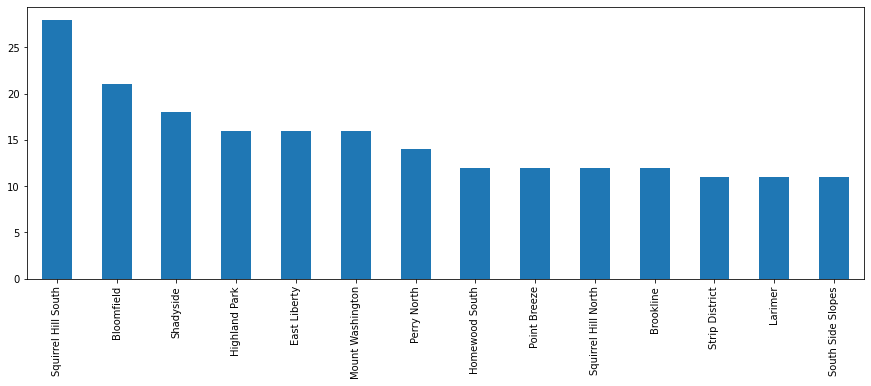

In [5]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np 
traffic_data = pd.read_csv("traffic.csv")

traffic_data.head()
df = traffic_data[['neighborhood']]

traffic_data['neighborhood'].value_counts().loc[lambda x : x>10].plot(kind='bar', figsize=(15,5))

The data shows the distribution of camera between neighborhoods, which could cause a skew in the data as some neighborhoods. However, we will take that into account later.

The next data point will show the amount of bikers in a certain area. If there are a high number of bikers in a certain area, that would imply that area is safe.

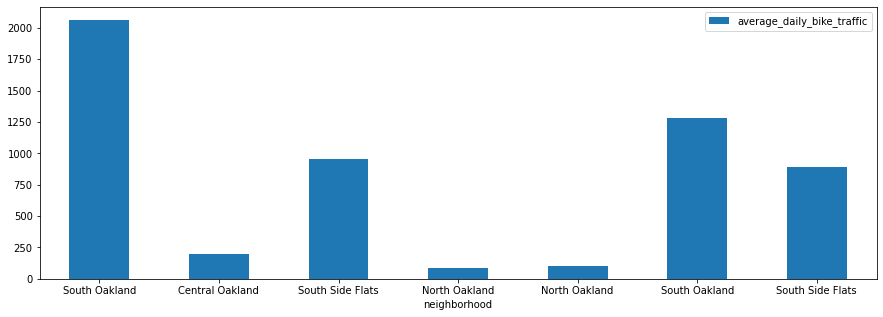

In [6]:
df = pd.read_csv("traffic.csv")
df = df[df['average_daily_bike_traffic'].notna()]
df.plot.bar(x='neighborhood', y='average_daily_bike_traffic', rot=0, figsize=(15,5))

This is giving us more information about the individual neighborhoods. There aren't a lot of individual datapoints for bike traffic, which is one of the drawbacks from this dataset, so we'll look at car traffic to determine safety in each neighborhood.

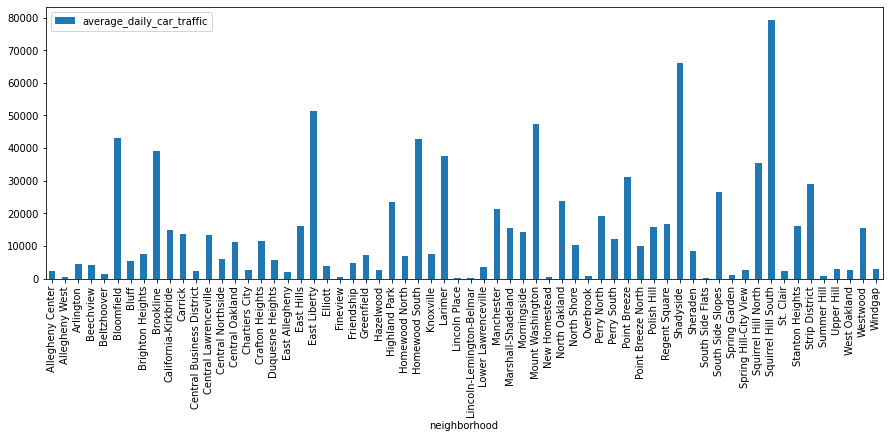

In [7]:
speeding = pd.read_csv('traffic.csv', usecols=["average_daily_car_traffic", "neighborhood"])
speeding = speeding[speeding['average_daily_car_traffic'].notna()]
speeding = speeding.groupby(['neighborhood']).sum()
speeding.drop(speeding[speeding['average_daily_car_traffic'] <= 50].index, inplace = True)
speeding.plot.bar(figsize=(15,5))

This is much more usable information. There are several neighborhoods that have very very high levels of traffic. This indicates that there are more cars in general in that area and would be generally an area to avoid as a door dash delivery driver. I would like to point out a few notable neighborhoods missing from the above group: the central business district, any oakland districts, and the south side flats. All neighborhoods which we have as top canidates for best neighborhood. One thing to consider is the lack of significant numbers in the central business district, which I think is explained by the very few datapoints we have in that area.

The final piece of information we are going to look at is speeding percent in each neighborhood.

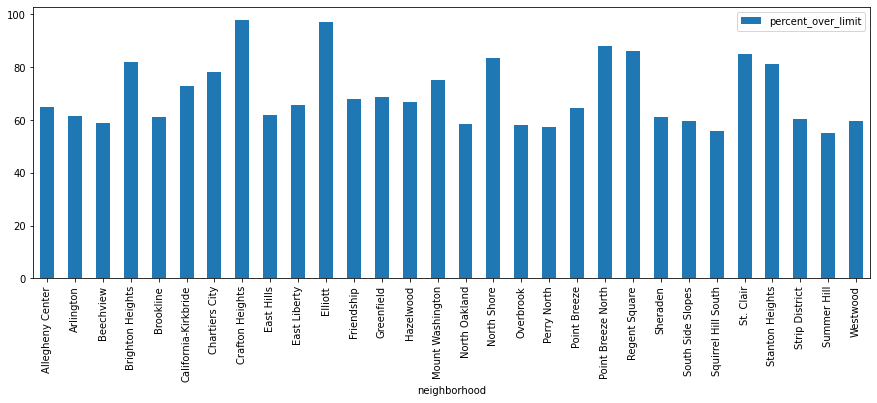

In [8]:
speeding = pd.read_csv('traffic.csv', usecols=["percent_over_limit", "neighborhood"])
speeding = speeding[speeding['percent_over_limit'].notna()]
speeding = speeding.groupby(['neighborhood']).mean()
speeding.drop(speeding[speeding['percent_over_limit'] <= 50].index, inplace = True)
speeding.plot.bar(figsize=(15,5))

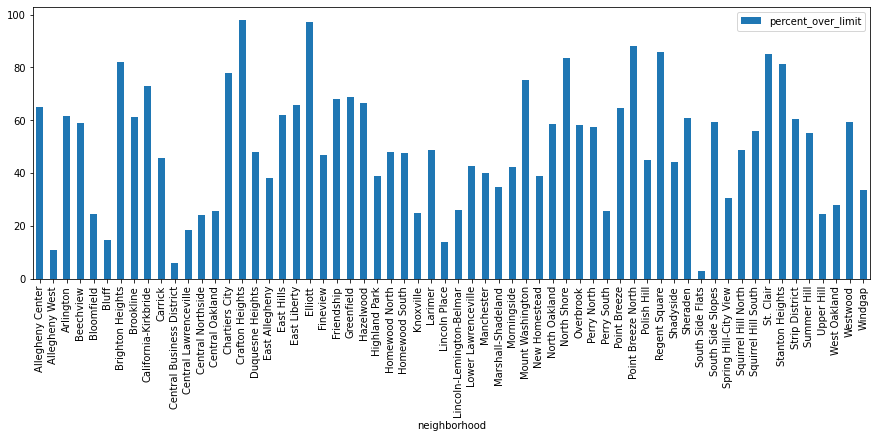

In [9]:
speeding = pd.read_csv('traffic.csv', usecols=["percent_over_limit", "neighborhood"])
speeding = speeding[speeding['percent_over_limit'].notna()]
speeding = speeding.groupby(['neighborhood']).mean()
speeding.plot.bar(figsize=(15,5))

The second bar chart is all of the data without the limit set on it. I find this hard to view so we just added both charts. Overall you can see a lot of districts stand out. Crafton heights is worst, with Elliot, North Shore and Point Breeze shortly behind. In Crafton Heights, almost every car is going over the speedlimit.